# Let's Grow More (LGMVIP) - "DATA SCIENCE INTERN"

<font size="4">Author Reginold K Binoy</font>

## BEGINNER LEVEL TASK

### Task 2 -Stock Market Prediction And Forecasting Using Stacked LSTM

Datasetlinks: : https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

# Importing neccesary Libraries

In [1]:
import numpy as np
import pandas as pd
import datetime
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , LSTM
from sklearn.metrics import mean_squared_error

In [1]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/0f/a5/89a9bdae9f241cad167edb6c890ef2b4c842c5ae81058a2fbfd702dba9bf/tensorflow-2.17.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Using cached tensorflow-2.17.0-cp311-cp311-macosx_12_0_arm64.whl.metadata (4.1 kB)
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Obtaining dependency information for flatbuffers>=24.3.25 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2dbd0ad418

  Obtaining dependency information for tensorboard-data-server<0.8.0,>=0.7.0 from https://files.pythonhosted.org/packages/7a/13/e503968fefabd4c6b2650af21e110aa8466fe21432cd7c43a84577a89438/tensorboard_data_server-0.7.2-py3-none-any.whl.metadata
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.2/236.2 MB 2.1 MB/s eta 0:00:000m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 777.4 kB/s eta 0:00:00 kB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 9.8 MB/s eta 0:00:000m eta 0:00:010:0101
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 8.1 MB/s eta 0:00:000m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.8 MB/s eta 0:00:000m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 10.0 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━

# Loading the Dataset

In [2]:
Dataset_link='https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'

In [3]:
df= pd.read_csv(Dataset_link, parse_dates=True,)
df.reset_index()
df.head(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
5,2018-09-21,235.00,237.00,227.95,233.75,234.60,5395319,12589.59
6,2018-09-19,235.95,237.20,233.45,234.60,234.90,1362058,3202.78
7,2018-09-18,237.90,239.25,233.50,235.50,235.05,2614794,6163.70
8,2018-09-17,233.15,238.00,230.25,236.40,236.60,3170894,7445.41
9,2018-09-14,223.45,236.70,223.30,234.00,233.95,6377909,14784.50


In [4]:
df.sample(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1185,2013-12-11,147.95,147.95,146.25,147.20,147.00,1285575,1889.48
445,2016-12-14,123.85,124.80,122.40,122.95,122.75,826188,1021.86
1522,2012-08-02,125.95,130.90,125.95,130.30,130.05,3704533,4800.89
428,2017-01-06,125.40,126.95,124.05,124.50,124.65,1255021,1573.67
657,2016-02-03,123.05,124.80,121.00,121.65,121.75,877186,1080.52
1732,2011-10-03,85.50,85.50,83.60,83.85,84.00,659545,557.79
1129,2014-03-03,139.95,141.00,135.25,135.75,135.95,2979960,4105.11
145,2018-02-27,275.00,279.70,273.10,275.40,275.00,4778178,13208.65
153,2018-02-15,284.35,285.25,276.00,279.85,279.05,1807307,5082.79
1984,2010-09-30,122.30,122.70,119.15,121.05,120.20,1240038,1495.40


# Data Preprocessing

In [5]:
df.columns


Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [6]:
df.shape

(2035, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [10]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [11]:
df.describe()


,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


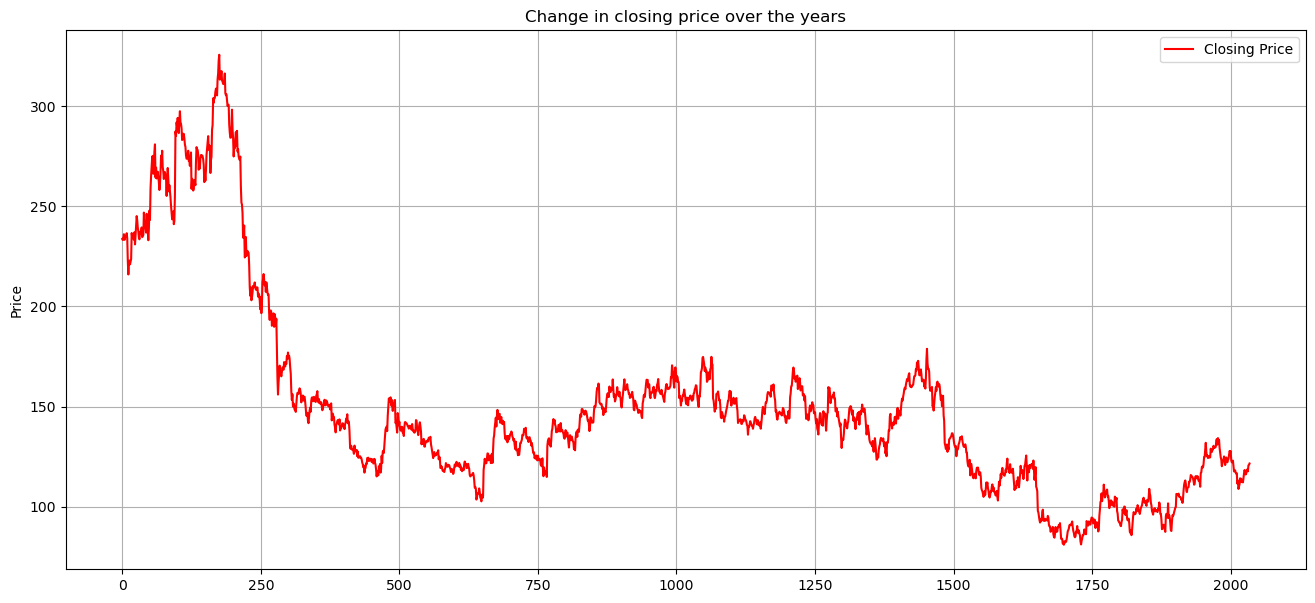

In [12]:
plt.figure(figsize=(10,6))
df['Close'].plot(kind='line',figsize=(16,7),color='r',label="Closing Price")

plt.ylabel("Price")
plt.legend(loc="upper right")
plt.title("Change in closing price over the years")
plt.grid()

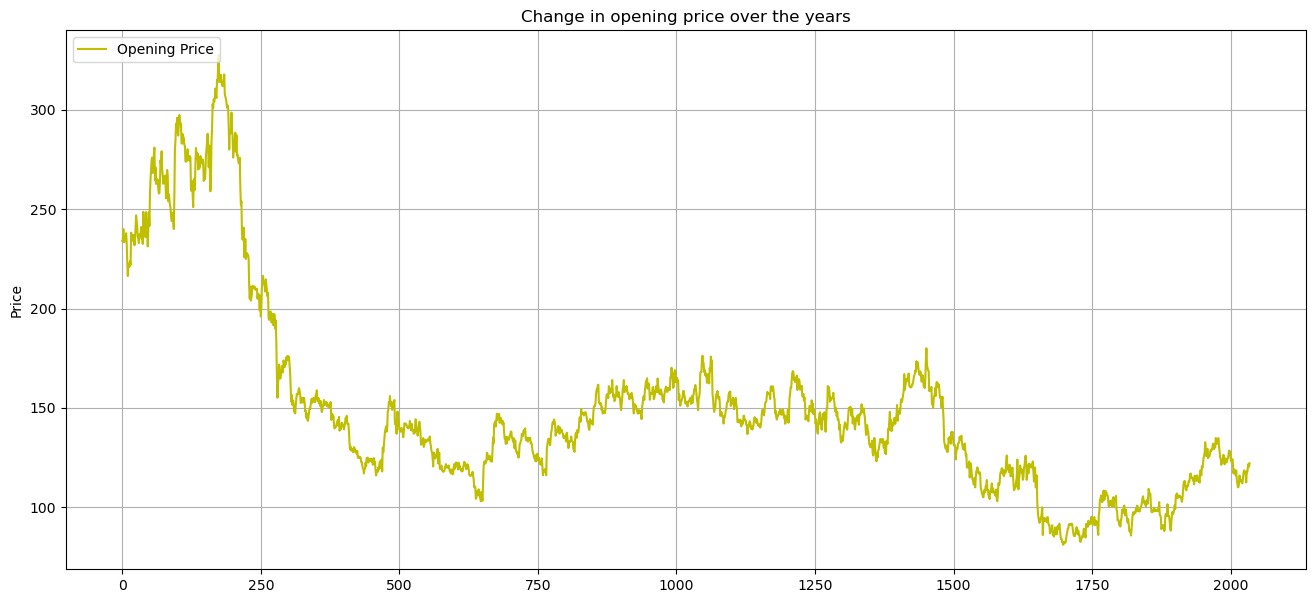

In [13]:
plt.figure(figsize=(10,6))
df['Open'].plot(kind='line',figsize=(16,7),color='y',label="Opening Price")

plt.ylabel("Price")
plt.legend(loc="upper left")
plt.title("Change in opening price over the years")
plt.grid()

In [14]:
df1=df.reset_index()['Close']
df1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

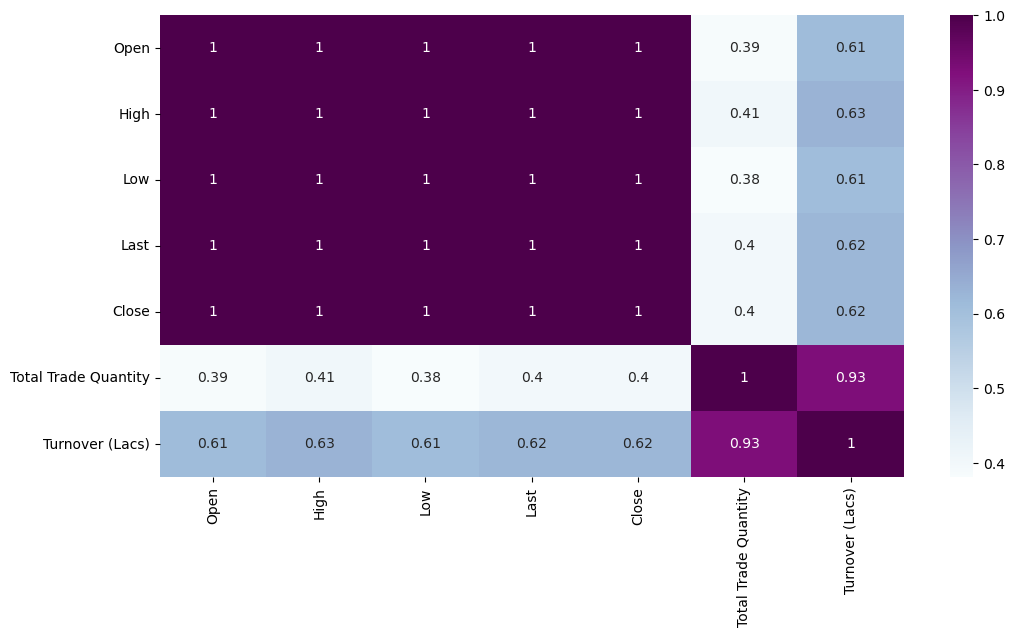

In [18]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Plot the heatmap with correlation of numeric columns
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='BuPu')
plt.show()


<Axes: ylabel='Turnover (Lacs)'>

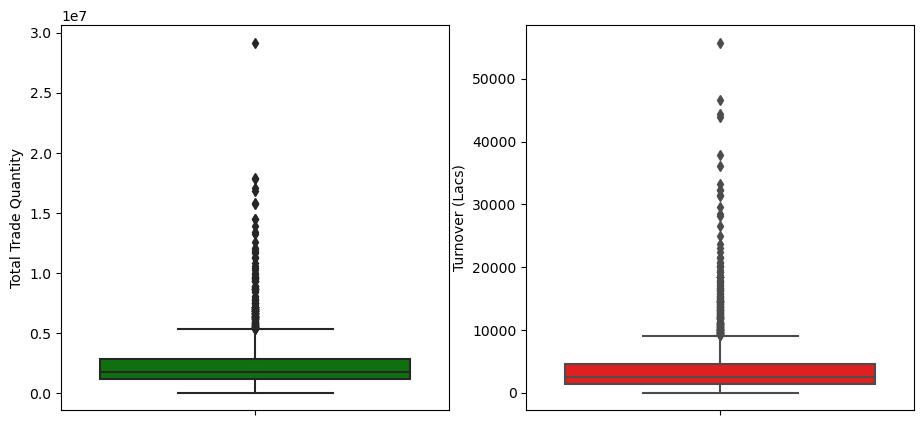

In [19]:
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
sns.boxplot(data=df,y='Total Trade Quantity',color='green')
plt.subplot(1,2,2)
sns.boxplot(data=df,y='Turnover (Lacs)',color='red')

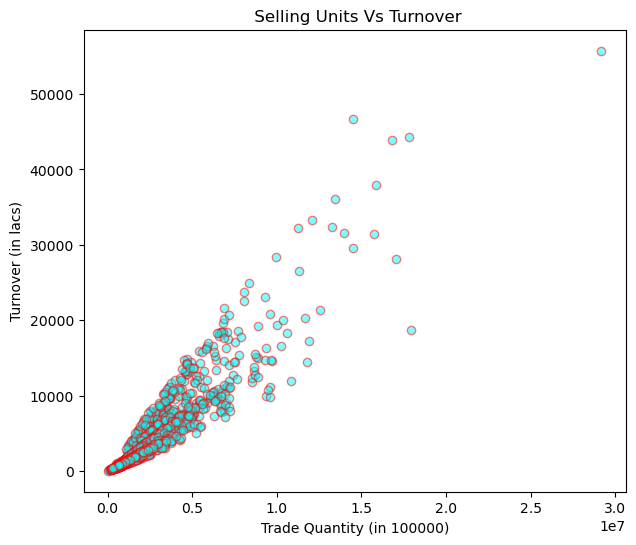

In [20]:
fig=plt.figure(figsize=(7,6))
plt.scatter(df['Total Trade Quantity'],df['Turnover (Lacs)'], alpha=0.5, edgecolor='r', color='cyan')
plt.xlabel("Trade Quantity (in 100000)")
plt.ylabel("Turnover (in lacs)")
plt.title(" Selling Units Vs Turnover")
plt.show()

In [21]:
training_set= df[['Open']]
training_set=pd.DataFrame(training_set)
training_set

,Open
0,234.05
1,234.55
2,240.00
3,233.30
4,233.55
...,...
2030,117.60
2031,120.10
2032,121.80
2033,120.30


In [22]:
scaler=MinMaxScaler(feature_range=(0,1))
training_set_scaler=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [23]:
training_set_scaler


array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [24]:
train_size1= int(len(training_set_scaler)*0.65)
test_size1=int(len(training_set_scaler))-train_size1
train_data1,test_data1=training_set_scaler[0:train_size1,:],training_set_scaler[train_size1:len(df),:1]

In [25]:
train_size1


1322

In [26]:
def create_dataset(dataset,time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [27]:
time_step=100
x_train, y_train=create_dataset(train_data1, time_step)
x_test, y_test= create_dataset(test_data1, time_step)

In [28]:
print(x_train.shape,y_train.shape)


(1221, 100) (1221,)


In [29]:
x_test.shape


(612, 100)

In [30]:
y_test.shape


(612,)

In [31]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

# Creating the LSTM Model

In [33]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [34]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 75, batch_size = 64, verbose = 1)


Epoch 1/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 1.1716e-04 - loss: 0.0529 - val_accuracy: 0.0016 - val_loss: 0.0050
Epoch 2/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 4.0875e-04 - loss: 0.0041 - val_accuracy: 0.0016 - val_loss: 0.0018
Epoch 3/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 7.8848e-04 - loss: 0.0020 - val_accuracy: 0.0016 - val_loss: 8.6157e-04
Epoch 4/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.0010 - loss: 0.0018 - val_accuracy: 0.0016 - val_loss: 0.0010
Epoch 5/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 8.9477e-04 - loss: 0.0015 - val_accuracy: 0.0016 - val_loss: 0.0012
Epoch 6/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - accuracy: 4.0875e-04 - loss: 0.0012 - val_accuracy: 0.0016 - val_loss: 8.4300e-04
Epoch 7/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 7.8848e-04 - loss: 0.0013 - val_accuracy: 0.0016 - val_loss: 0.0010
Epoch 8/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.0014 - loss:

Epoch 49/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.0027 - loss: 5.3899e-04 - val_accuracy: 0.0016 - val_loss: 5.6015e-04
Epoch 50/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - accuracy: 6.1280e-04 - loss: 5.3502e-04 - val_accuracy: 0.0016 - val_loss: 5.7303e-04
Epoch 51/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.0016 - loss: 4.7661e-04 - val_accuracy: 0.0016 - val_loss: 4.9496e-04
Epoch 52/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.0010 - loss: 4.7920e-04 - val_accuracy: 0.0016 - val_loss: 5.3196e-04
Epoch 53/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 2.9837e-04 - loss: 6.3213e-04 - val_accuracy: 0.0016 - val_loss: 4.4031e-04
Epoch 54/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 2.9837e-04 - loss: 4.8884e-04 - val_accuracy: 0.0016 - val_loss: 4.0410e-04
Epoch 55/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - accuracy: 0.0027 - loss: 4.9408e-04 - val_accuracy: 0.0016 - val_loss: 5.9273e-04
Epoch 56/75
20/20 ━━━━━━━━━━━━━━━━

In [36]:
train_predict1=model.predict(x_train)
test_predict1=model.predict(x_test)
#Transformback to original form
train_predict1=scaler.inverse_transform(train_predict1)
test_predict1=scaler.inverse_transform(test_predict1)

39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [37]:
math.sqrt(mean_squared_error(y_train,train_predict1))


170.67222279954558

In [38]:
math.sqrt(mean_squared_error(y_test,test_predict1))


118.91130101481141

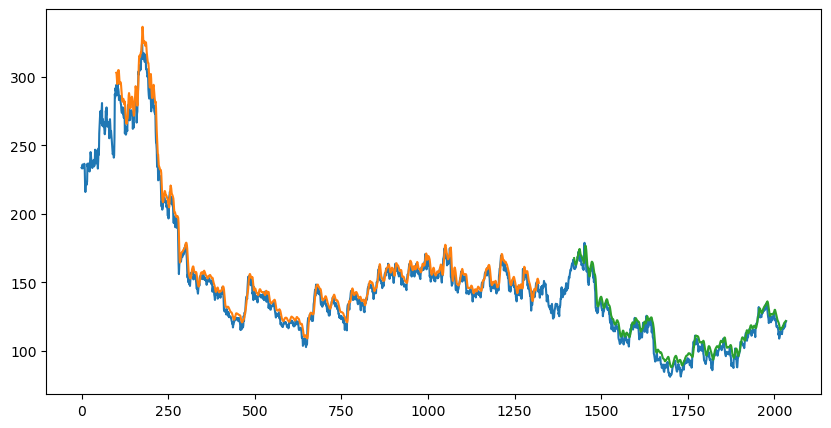

In [39]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(training_set_scaler)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict1)+look_back, :] = train_predict1

# shift test predictions for plotting
testPredictPlot = np.empty_like(training_set_scaler)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict1)+(look_back*2)+1:len(df1)-1, :] = test_predict1

# plot baseline and predictions
plt.figure(figsize=(10,5))
plt.plot(scaler.inverse_transform(training_set_scaler))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Thank You